0.01882444568449888
1.664990618720989


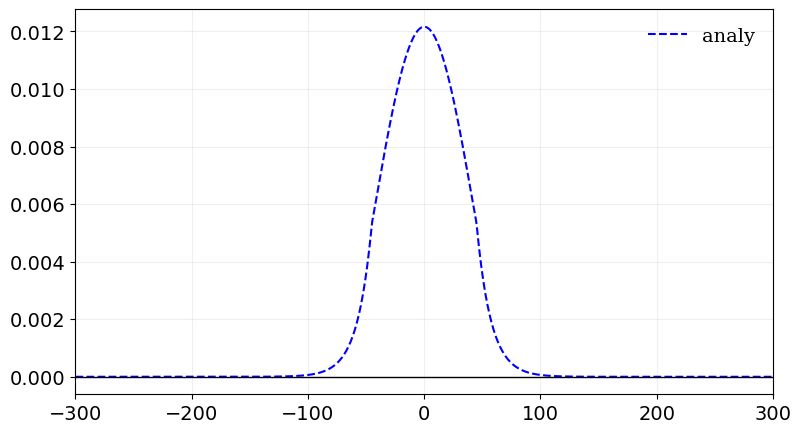

In [35]:
from scipy.integrate import simps
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Normalizing function analy
def analy(x):
    E=0.02847
    V_0 = 0.131234
    d=90
    m_w=0.047422
    m_b=0.0602291
    k_w = np.sqrt(m_w*E/(3.809982143))
    print(k_w)
    k_b = np.sqrt(m_b*(V_0-E)/(3.809982143))
    d = 90
    
    A=1/(np.sqrt(np.cos(k_w*d/2)*np.cos(k_w*d/2)/k_b + (np.sin(k_w*d)+d*k_w)/(2*k_w)))
    #A=1/((np.sin(k_w*d)+d*k_w)/(2*k_w))
    B=A*np.cos(k_w*d/2)
    
#     B = 0.5/(1/k_w + k_w*np.tan(k_w*d/2))
#     A = B / np.cos(k_w*d/2)
    y = np.zeros_like(x)
    mask1 = x < -d/2
    mask2 = x > d/2
    mask3 = (~mask1) & (~mask2)  # Ensure mutual exclusivity
    y[mask1] = B * np.exp(-k_b * (-x[mask1] - (d/2)))
    y[mask2] = B * np.exp(-k_b * (x[mask2] - (d/2)))
    y[mask3] = A * np.cos(-k_w * (x[mask3]))
    return y

# Normalizing function analy2
def analy2(x):
    E = 0.12463
    V_0 = 0.131234
    d = 90
    m_w = 0.047422
    m_b = 0.0602291
    k_w = np.sqrt(m_w * E / (3.809982143))
    k_b = np.sqrt(m_b * (V_0 - E) / (3.809982143))
    d = 90
    A = 1
    B = A * np.sin(k_w * d / 2)
    y = np.zeros_like(x)
    mask1 = x < -d/2
    mask2 = x > d/2
    mask3 = (~mask1) & (~mask2)  # Ensure mutual exclusivity
    y[mask1] = -B * np.exp(-k_b * (-x[mask1] - (d / 2)))
    y[mask2] = B * np.exp(-k_b * (x[mask2] - (d / 2)))
    # Limit the range of x for which the exponential term is calculated
    y[~mask1 & ~mask2] = A * np.sin(k_w * (x[~mask1 & ~mask2]))
    return y
# Generate x values
x_values = np.linspace(-300, 300, 1000)

# Generate y values for each function
analy_values = analy(x_values)
analy2_values = analy2(x_values)

from scipy.integrate import simps

integral2 = simps(analy_values, x_values)
# Normalize analy2 by dividing each value by the integral
# analy2_normalized = analy2_values / integral
analy_normalized = analy_values


# Plotting
plt.figure(figsize=(9, 5))

plt.plot(x_values, analy_values**2, color='blue', linestyle='--', label='analy')
#plt.plot(x_values, analy2_normalized, color='red', linestyle='-.', label='analy2')

plt.axhline(0, color='black', linewidth=1)  # Solid black x-axis at y=0
plt.xlim(-300, 300)  # Set x-axis limits
plt.ylim()  # Set y-axis limits
plt.grid(True, alpha=0.2)
TICK_FONT_SIZE = 14
plt.xticks(fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)
print(sum(analy_values**2))

# Set font family and size for legend
font = FontProperties(family='serif', size=14)
plt.legend(loc='upper right', prop=font, frameon=False)

plt.show()
